In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import numpy.fft as nfft

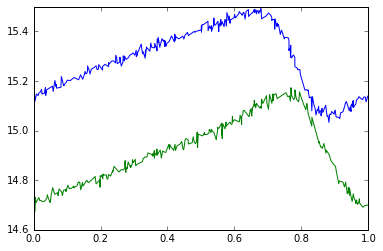

In [3]:
d16=np.genfromtxt('169975.dat_folded')
d51=np.genfromtxt('51886.dat_folded')
plt.plot(d16[:,0], d16[:,1])
plt.plot(d51[:,0], d51[:,1])

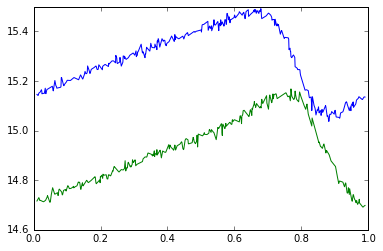

In [4]:
from scipy.interpolate import interp1d
x1 = np.linspace(0.01,0.99, 1024)
c51=interp1d(d51[:,0], d51[:,1])(x1)
c16=interp1d(d16[:,0], d16[:,1])(x1)
plt.plot(x1, c16)
plt.plot(x1, c51)

## Q1. Computing Cross-Correlation

We provide here a standardization function

In [5]:
def stand(x):
    return (x-np.mean(x))/np.std(x, ddof=0)

Write a function that takes two time seroes and uses the fourier method to calculate a cross-correlation function

In [6]:
def ccor(ts1, ts2):
    "given two standardized time series, compute their cross-correlation using FFT"
    # Get the values of the time series into a list
    ts1_p, ts2_p = list(ts1), list(ts2)

    ts2_p = np.array(ts2_p)
    ts1_p = np.array(ts1_p)

    inter = nfft.fft(ts1_p) * np.conjugate(nfft.fft(ts2_p))
    res = nfft.ifft( inter )
    return res

We plot the correlation function. Where does it maximize?

/Users/vinaysubbiah/anaconda/envs/py35/lib/python3.5/site-packages/numpy/core/numeric.py:482: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


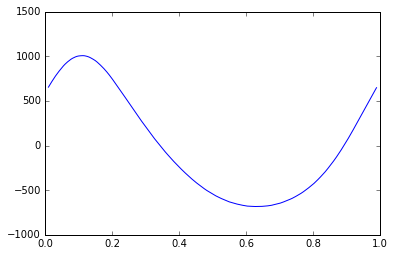

In [7]:
plt.plot(x1, ccor(stand(c51), stand(c16)))

Solution - Maximizes at a little more than 0.1

## Q2. Dimensionality reduction with SAX

The idea behind SAX is to reduce dinensionality by capturing pieces of the curve and getting an average. So you are replacing the function by a set of steps. The next part is to encode the steps using some technique, here we will use binary strings. The [iSAX paper](https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=1&ved=0ahUKEwi2y4u9p__LAhUD9R4KHYslCuAQFggdMAA&url=http%3A%2F%2Fwww.cs.ucr.edu%2F~eamonn%2FiSAX.pdf&usg=AFQjCNEhDE8xHlXBVfSkLUBo4UsVRHOyTw&sig2=dgG-oNiR2MAYcqyUWzCs3Q), which you should skim, at the very least, is the source of this explanation below

![](https://dl.dropboxusercontent.com/u/75194/saxrepr.png)



Our interpolated curves have 1024 points. Bin them in chunks of 32, so we have $w=32$ chunks, and use a cardinality $a=4$ to get a SAX(T, 32, 4). Represent both light curves this way. For bonus points solve it for a general cardinality a (you'll have to get the gaussian deivision from the table above).

Remember you are doing this on standardized time series. You can assume that the series has been interpolated to a power of 2 length. Write a function to do this below:

In [13]:
def representer4(series, w): # a will be 4
    #your code here
    series_short = np.empty(w)
    rep = np.empty(w, dtype=str)
    for i in range(w):
        series_short[i] = np.mean(series[i:(i+1)*32])
        if series_short[i] >= 0.67:
            rep[i] = "a"
        elif series_short[i] >= 0:
            rep[i] = "b"
        elif series_short[i] >= -0.67:
            rep[i] = "c"
        else:
            rep[i] = "d"
    return rep

We apply the function

In [14]:
representer4(stand(c51), 32)

array(['d', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd',
       'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'b', 'b', 'b',
       'b', 'b', 'b', 'b', 'b', 'b'], 
      dtype='<U1')

In [15]:
representer4(stand(c16), 32)

array(['d', 'd', 'd', 'd', 'd', 'd', 'c', 'c', 'c', 'c', 'c', 'c', 'c',
       'c', 'c', 'c', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b',
       'b', 'b', 'b', 'b', 'b', 'b'], 
      dtype='<U1')

## Q3. VPTree (to read, not to submit)

Read the VPTree implementation is modified from https://github.com/huyng/algorithms/tree/master/vptree. Also see http://stevehanov.ca/blog/index.php?id=130 for a good explanation of the concepts (and C++ code if you are so inclined). You will use the VPtree to store some distances next week in an index so it is imperative that you read atleast one implementation.

